https://de.wikipedia.org/wiki/Yule-Walker-Gleichungen

http://thomas-cokelaer.info/software/spectrum/html/user/tutorial_yulewalker.html

pip3 install spectrum

`%matplotlib` prevents importing * from pylab and numpy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Populating the interactive namespace from numpy and matplotlib


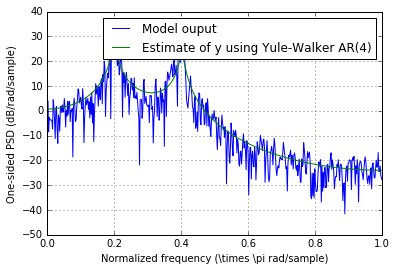

In [12]:
%pylab inline
import scipy.signal
from spectrum import *

# Create a AR model
a = [1, -2.2137, 2.9403, -2.1697, 0.9606]
# create some data based on these AR parameters
y = scipy.signal.lfilter([1], a, randn(1, 1024))

# if we know only the data, we estimate the PSD using Periodogram
p = Periodogram(y[0], sampling=2)  # y is a list of list hence the y[0]
p()
p.plot(label='Model ouput')
# now, let us try to estimate the original AR parameters
AR, P, k = aryule(y[0], 4)
PSD = arma2psd(AR, NFFT=512)
PSD = PSD[len(PSD):len(PSD)/2:-1]
plot(linspace(0, 1, len(PSD)), 10*log10(abs(PSD)*2./(2.*pi)),
    label='Estimate of y using Yule-Walker AR(4)')
xlabel(r'Normalized frequency (\times \pi rad/sample)')
ylabel('One-sided PSD (dB/rad/sample)')
legend()


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


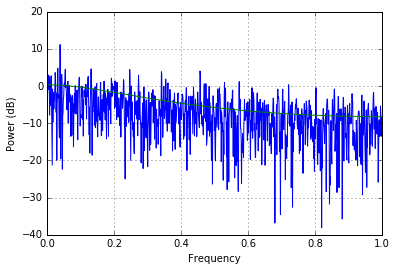

In [52]:
%pylab inline
import pandas as pd
DF=pd.read_csv('../stunde7/Anomalien.csv',parse_dates=[0])
TA=pd.Series(DF['Anomalie'].data,index=DF['Datum'])
y=array(TA.data[:-1])[0:2048]
y=y/std(y)
p = Periodogram(y, sampling=2) 
p()
p.plot(label='Model ouput')
AR, P, k = aryule(y, 1)
PSD = arma2psd(AR, NFFT=512)
PSD = PSD[len(PSD):len(PSD)/2:-1]
#plot(10*log10(abs(PSD)*2./(2.*pi)))
plot(linspace(0, 1, len(PSD)), 10*log10(abs(PSD)*2./(2.*pi)),
    label='Estimate of y using Yule-Walker AR(4)')

In [56]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
clf.coef_

array([ 0.5,  0.5])

Coefficients: 
 [ 938.23786125]
Residual sum of squares: 2548.07
Variance score: 0.47


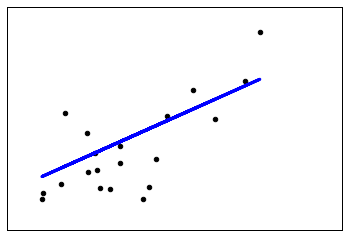

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()